<a href="https://colab.research.google.com/github/nidhipriya2000/-HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/Copy_of_HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# 1. Understanding and looking at the problem

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading file
file_ = pd.read_csv("/content/drive/MyDrive/Copy of TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

## Importing libraries

In [ ]:
#importing required libraries
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

sns.set_style("dark")

In [ ]:
#creating a copy so that it does not impact the original file
df= file_.copy()

In [ ]:
#have a look at the data
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [ ]:
#looking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


So, there are no null values in the dataset!!!!!

In [ ]:
#some more information about our data set(descriptive stats)
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
#counting responses
df.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

#2. EXPLORATORY DATA ANALYSIS

##PLOT OF RESPONSES(1 for yes, 0 for no)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


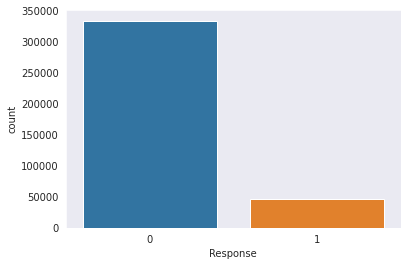

In [ ]:
#Plot to inspect the willing customers for getting an insurance
sns.countplot(df['Response'],data=df)

##PLOT OF WILLING MALES AND FEMALES

Text(0.5, 1.0, 'Difference in responses of males and females')

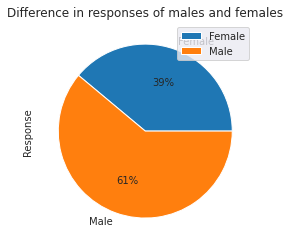

In [ ]:
#pie chart of positive responses from males vs females
df.groupby(['Gender']).sum().plot(
    kind='pie', y='Response', autopct='%1.0f%%')
plt.title("Difference in responses of males and females")

This shows that 61% of males and 39% of females are interested in getting an insurance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Responses of Males vs that of females')

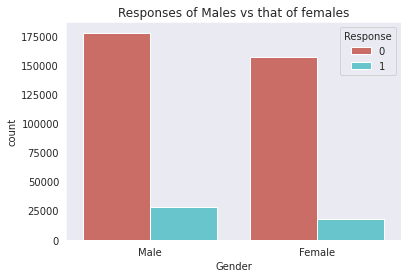

In [ ]:
#for clear visualization
sns.countplot(df['Gender'], hue = df['Response'],palette="hls")
plt.title("Responses of Males vs that of females")

AGE AND REPONSE

Text(0.5, 1.0, 'Plot of age vs response')

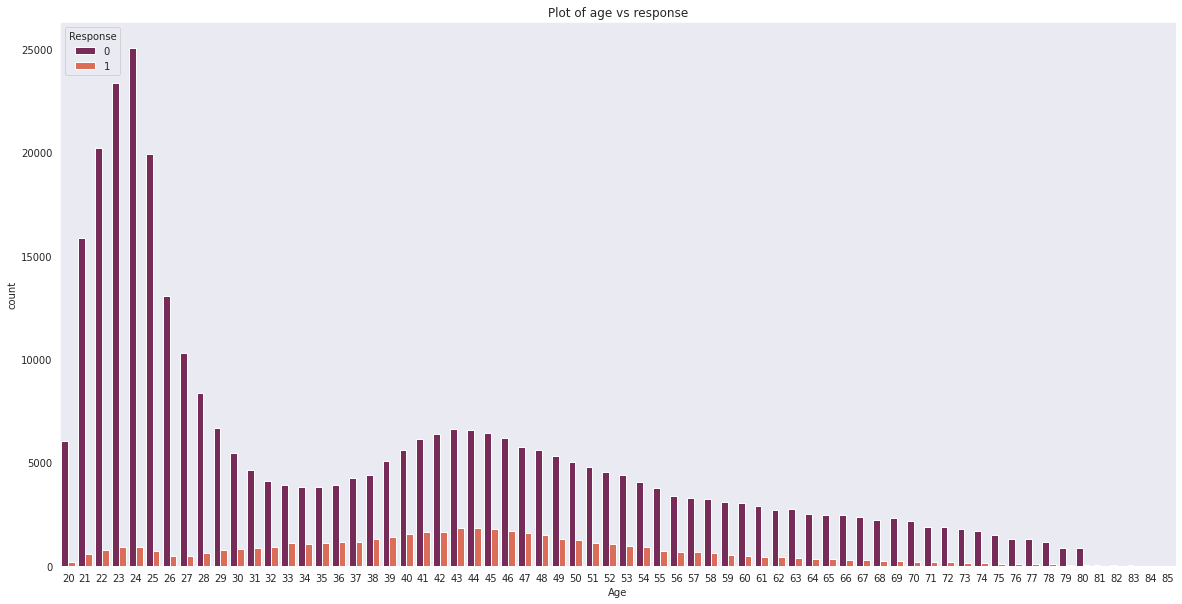

In [ ]:
#plot clearly stating positive and negative respones of different age groups
plt.figure(figsize=(20,10))
sns.countplot(x='Age',hue='Response',data=df, palette="rocket")
plt.title("Plot of age vs response")

RESPONSE OF PREVIOUSLY INSURED PEOPLE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Preference of Previously insured people')

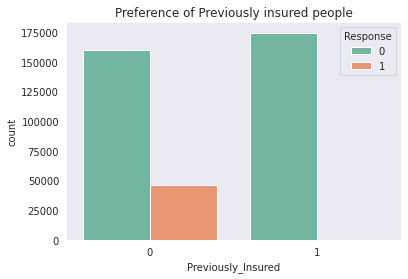

In [ ]:
sns.countplot(df['Previously_Insured'],hue='Response',data=df,palette='Set2')
plt.title("Preference of Previously insured people")

RESPONSE OF PEOPLE OWNING A DRIVING LICENSE

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Preference of people owing a driving license')

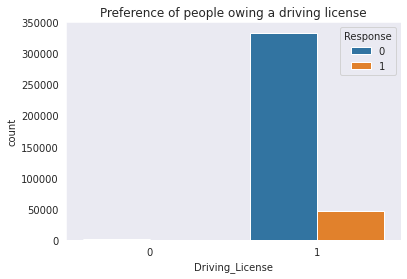

In [ ]:
sns.countplot(df['Driving_License'],hue=df['Response'])
plt.title("Preference of people owing a driving license")

PLOT SHOWING RELATION BETWEEN RESPONSES AND AGE OF VEHICLE OWNED BY CUSTOMERS

Text(0.5, 1.0, 'Responses of owners based on the life of their car')

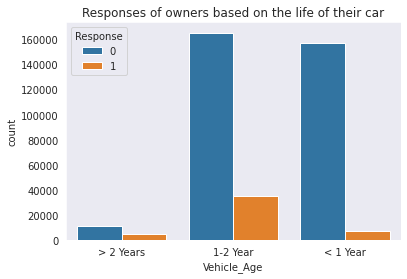

In [ ]:
sns.countplot(x='Vehicle_Age',hue='Response',data=df)
plt.title("Responses of owners based on the life of their car")

CORRELATION HEATMAP

Text(0.5, 1.05, 'Pearson correlation of Features')

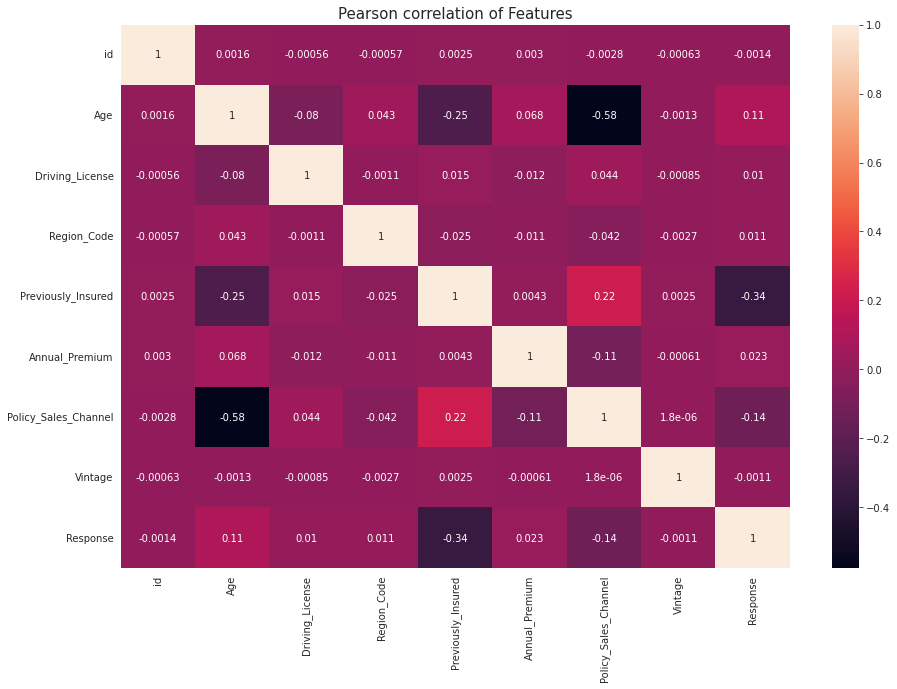

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot= True,ax=ax)
plt.title("Pearson correlation of Features", y=1.05, size=15)

# 3. DATA PREPRATION

In [ ]:
#changing catagorical value to binary form(0 and 1) using labelEncoder
labelEncoder= LabelEncoder()
df['Gender'] = labelEncoder.fit_transform(df['Gender'])
df['Vehicle_Age'] = labelEncoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage'] = labelEncoder.fit_transform(df['Vehicle_Damage'])

In [ ]:
df.head()  #this is how it looks like after implementing labelEncoder

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


Separating dependent and independent variable

In [ ]:
y=df['Response']      #dependent variable
X=df.drop(columns='Response')        #independent variable

Feature selection

[0.19293203 0.00609519 0.13882723 0.00046835 0.09648916 0.05897498
 0.01478122 0.07280939 0.16376434 0.06864132 0.18621679]


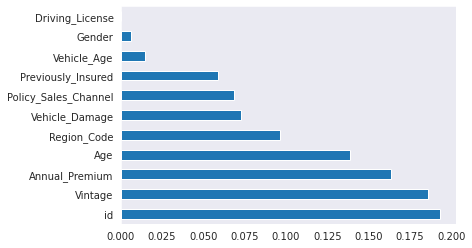

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based class
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()

In [ ]:
X=X.drop(['Driving_License'],axis=1) #dropping driving license as it has very less significance

Handling class imbalance

Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({1: 334399, 0: 334399})


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


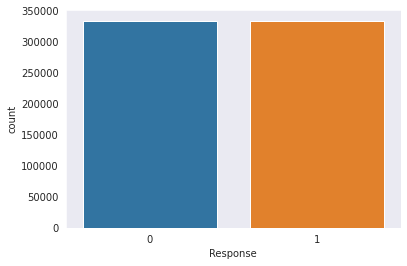

In [ ]:
randomsample=  RandomOverSampler()
X_new,y_new=randomsample.fit_resample(X,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))
sns.countplot(y_new)

#so random resampling made the data even and now the huge difference has been removed (using oversampling method)

TRAIN TEST SPLIT

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=.30,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

(468158, 10) (200640, 10) (468158,) (200640,)


# 4. MODEL SELECTION

(i) Logistic regression

In [ ]:
reg=LogisticRegression()
reg=reg.fit(X_train,y_train)
pred=reg.predict(X_test)
lr_probability =reg.predict_proba(X_test)[:,1]


acc_lr=accuracy_score(y_test,pred)
recall_lr=recall_score(y_test,pred)
precision_lr=precision_score(y_test,pred)
f1score_lr=f1_score(y_test,pred)
AUC_LR=roc_auc_score(pred,y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.7836273923444976
ROC_AUC Score: 0.8336769343311451


In [ ]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.59      0.96      0.73     61473
           1       0.98      0.70      0.82    139167

    accuracy                           0.78    200640
   macro avg       0.78      0.83      0.78    200640
weighted avg       0.86      0.78      0.79    200640



ROC CURVE

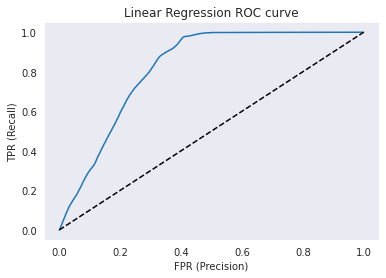

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

Confusion matrix

[[59194 41134]
 [ 2279 98033]]


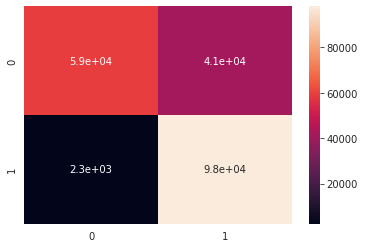

In [ ]:
cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True)

(ii)RANDOM FOREST CLASSIFIER

In [ ]:
randomforest = RandomForestClassifier()
randomforest=randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
RF_probability = randomforest.predict_proba(X_test)[:,1]



AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)

print("Accuracy:",accuracy_score(y_pred,y_test))
print("ROC_AUC Score:",AUC_RF)

0.945399720893142
ROC_AUC Score: 0.9501760843148634


In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     89991
           1       1.00      0.90      0.95    110649

    accuracy                           0.95    200640
   macro avg       0.95      0.95      0.95    200640
weighted avg       0.95      0.95      0.95    200640



ROC CURVE

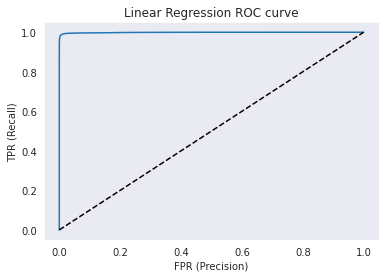

In [ ]:
fpr, tpr, _ = roc_curve(y_test, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

Confusion matrix

[[ 89682    309]
 [ 10646 100003]]


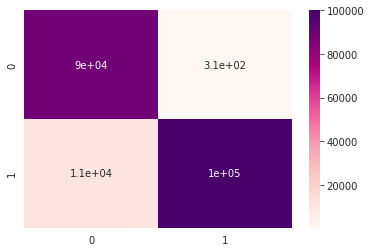

In [ ]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

(iii) XGB CLASSIFIER

In [ ]:
xgb=XGBClassifier()
XGB_fit=xgb.fit(X_train, y_train)
y_predict = XGB_fit.predict(X_test)
XGB_probability = XGB_fit.predict_proba(X_test)[:,1]

acc_xgb=accuracy_score(y_test,y_predict)
recall_xgb=recall_score(y_test,y_predict)
precision_xgb=precision_score(y_test,y_predict)
f1score_xgb=f1_score(y_test,y_predict)

AUC_xgb=roc_auc_score(y_predict,y_test)


print("Accuracy:",accuracy_score(y_predict,y_test))
print("ROC_AUC Score:",AUC_xgb)

0.7969198564593302
ROC_AUC Score: 0.8200889688230641


In [ ]:
print(classification_report(y_predict,y_test))


              precision    recall  f1-score   support

           0       0.66      0.91      0.77     73336
           1       0.93      0.73      0.82    127304

    accuracy                           0.80    200640
   macro avg       0.80      0.82      0.79    200640
weighted avg       0.83      0.80      0.80    200640



ROC CURVE

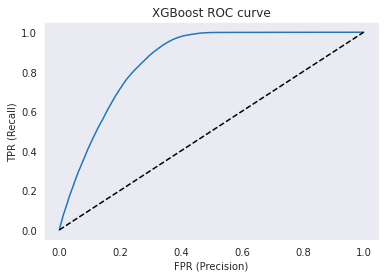

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

CONFUSION MATRIX

[[66459 33869]
 [ 6877 93435]]


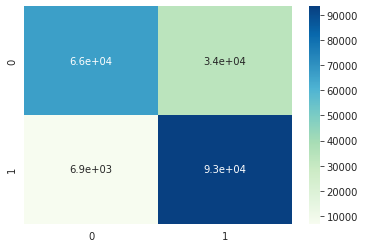

In [ ]:
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

# 5. COMPAIRING THE MODELS

Compairing all the models by writing all the results in one table

In [ ]:
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.783627,0.977281,0.704427,0.818719,0.833677
Randomforest,0.945400,0.996920,0.903786,0.948071,0.950176
XGBClassifier,0.796920,0.931444,0.733952,0.820988,0.820089


# 6. CONCLUSIONS

1. Most of the customers are unwilling for getting a vehicle insurance

2. More males are interested in getting insurance (61%) as compared to females(38%)

3. People of the group 30-50 are the most interested in getting a vehicle insurance

4. The customers who have vehicle with age guarantee for 1-2 years are most interested

5. Customers with driving license

6. Features like vintage, Annual_Premium, age are impacting the target variable the most.

7. Compairing the models on the basis of ROC curve, accuracy, precision, f1_score and recall the RandomForest is giving the best results.   
